# Checkpoint 2

In [1]:
# imports.
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

In [3]:
# Constants
G       = 6.67408e-11 # m^3 s^-1 kg^-2
AU      = 149.597e9 # m
Mearth  = 5.9721986e24 # kg
Mmars   = 6.41693e23 # kg
Msun    = 1.988435e30 # kg
day2sec = 3600 * 24 # seconds in one day

## Initial Conditions
Below are the initial positions and velocities for Earth and Mars.

In [4]:
# positions and velocities at t=0 (2019/6/2)
rs = [[-4.8957151e10, -1.4359284e11, 501896.65],  # Earth
      [-1.1742901e11, 2.1375285e11, 7.3558899e9]] # Mars (units of m)
vs = [[27712., -9730., -0.64148], # Earth
      [-20333., -9601., 300.34]]  # Mars (units of m/s)

## Historical Positions
Below are historical positions for Earth and Mars at t=-1000 days prior to 2019/6/2. These will be used in tasks 5 and 6.

In [5]:
# positions of the planets at (2019/6/2)-1000 days
rspast = [[1.44109e11, -4.45267e10, -509142.],   # Earth
          [1.11393e11, -1.77611e11, -6.45385e9]] # Mars

## Earth/Mars functions
Below are functions for the equations of motion (the vector of 1st derivtives) for Earth and Mars and for calculating the angle between Earth and Mars.

In [6]:
def earth_mars_motion(t, y):
    """
    # order of variables
    # 0,1,2 rx,ry,rz for Earth
    # 3,4,5 rx,ry,rz for Mars
    # 6,7,8 vx,vy,vz for Earth
    # 9,10,11 vx,vy,vz for Mars

    # order of derivatives:
    # 0,1,2 Drx,Dry,Drz for Earth
    # 3,4,5 Drx,Dry,Drz for Mars
    # 6,7,8 Dvx,Dvy,Dvz for Earth
    # 9,10,11 Dvx,Dvy,Dvy for Mars
    """

    rx1,ry1,rz1, rx2,ry2,rz2, vx1,vy1,vz1, vx2,vy2,vz2 = y
    drx1 = vx1
    dry1 = vy1
    drz1 = vz1
    drx2 = vx2
    dry2 = vy2
    drz2 = vz2
    
    GMmars  = G*Mmars
    GMearth = G*Mearth
    GMsun   = G*Msun
    
    rx12 = rx1 - rx2
    ry12 = ry1 - ry2
    rz12 = rz1 - rz2
    xy12 = np.power(np.power(rx12,2) + 2*np.power(ry12,2),1.5)
    xyz1 = np.power(np.power(rx1,2) + np.power(ry1,2) + np.power(rz1,2),1.5)
    xyz2 = np.power(np.power(rx2,2) + np.power(ry2,2) + np.power(rz2,2),1.5)

    dvx1 =  GMmars  * rx12 / xy12 - GMsun * rx1 / xyz1
    dvy1 =  GMmars  * ry12 / xy12 - GMsun * ry1 / xyz1
    dvz1 =  GMmars  * rz12 / xy12 - GMsun * rz1 / xyz1
    dvx2 = -GMearth * rx12 / xy12 - GMsun * rx2 / xyz2
    dvy2 = -GMearth * ry12 / xy12 - GMsun * ry2 / xyz2
    dvz2 = -GMearth * rz12 / xy12 - GMsun * rz2 / xyz2
    
    return np.array([drx1,dry1,drz1, drx2,dry2,drz2,
                     dvx1,dvy1,dvz1, dvx2,dvy2,dvz2])

def angle_between_planets(y):
    """
    Input should be same form as the y variable in the earth_mars_motion function.
    """
    r1 = y[0:3]
    r2 = y[3:6]
    return np.arccos((r1*r2).sum(axis=0) /
                     np.sqrt((r1*r1).sum(axis=0) * (r2*r2).sum(axis=0)))

## Task 1
Write a code that solves the equations and plots trajectories of Mars and Earth up to some $t_{max}$. The 3D plot should include at least one full orbit for each body.

/Users/callum/.conda/envs/coding/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


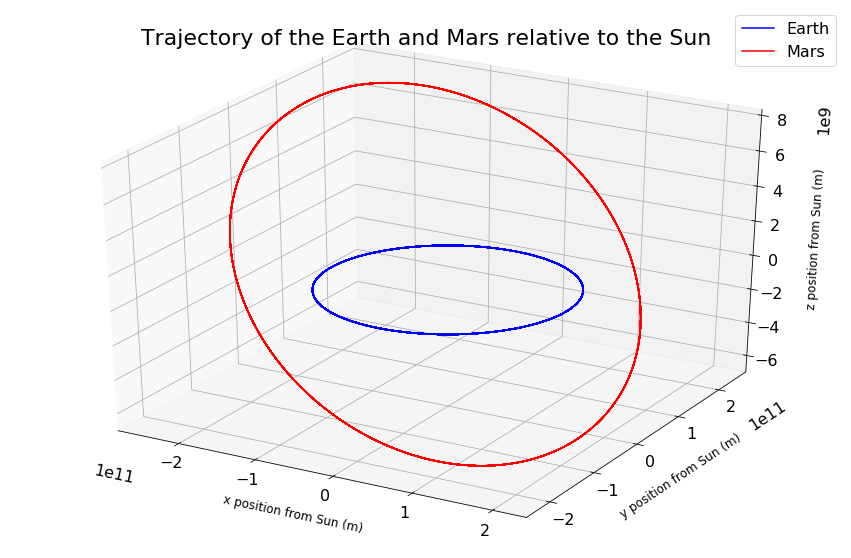

In [7]:
# setting time domain.
tmax = 8000*day2sec # 8000 days.
dt = 3600 # 1 hour.
ts = np.arange(0, tmax, dt)
trange = (ts[0], ts[-1])
    
def get_traj(initial_rs, initial_vs):
    ini = np.append(initial_rs, initial_vs) # initial coordinates of Earth and Mars
    sol = integrate.solve_ivp(earth_mars_motion, trange, ini, method = 'RK45', t_eval=ts, max_step = 1e6)
    
    rx1 = sol.y[0] # x pos of Earth
    ry1 = sol.y[1] # y pos of Earth
    rz1 = sol.y[2] # z pos of Earth
    
    rx2 = sol.y[3] # x pos of Mars
    ry2 = sol.y[4] # y pos of Mars
    rz2 = sol.y[5] # z pos of Mars
    
    vx1 = sol.y[6] # x velocity of Earth
    vy1 = sol.y[7] # y velocity of Earth
    vz1 = sol.y[8] # z velocity of Earth
    
    vx2 = sol.y[9] # x velocity of Mars
    vy2 = sol.y[10] # y velocity of Mars
    vz2 = sol.y[11] # z velocity of Mars
    
    y = sol.y
    t = sol.t
    
    return y, t
    

def plot_traj(y):
    
    # creating 3D figure object
    fig = plt.figure(figsize = (15,10))
    ax = fig.gca(projection='3d')
    
    rx1 = y[0] # x pos of Earth
    ry1 = y[1] # y pos of Earth
    rz1 = y[2] # z pos of Earth
    
    rx2 = y[3] # x pos of Mars
    ry2 = y[4] # y pos of Mars
    rz2 = y[5] # z pos of Mars
    
    # Plotting Earth and Mars trajectories
    earth, = ax.plot(rx1, ry1, rz1, c = 'b')
    earth.set_label('Earth')
    mars, = ax.plot(rx2, ry2, rz2, c = 'r')
    mars.set_label('Mars')
    plt.legend()
    
    # Labelling axes
    ax.xaxis.set_label_text('x position from Sun (m)', fontsize = 12)
    ax.xaxis.labelpad = 15
    ax.yaxis.set_label_text('y position from Sun (m)', fontsize = 12)
    ax.yaxis.labelpad = 15
    ax.zaxis.set_label_text('z position from Sun (m)', fontsize = 12)
    ax.zaxis.labelpad = 15
    plt.title('Trajectory of the Earth and Mars relative to the Sun', fontsize = 22)
    plt.show()
    
y, t = get_traj(rs, vs)
plot_traj(y)

## Task 2
Find the time of the next opposition to $\pm10$ days. Return the time in days from $t_0$ = 2 June 2019.

In [8]:
def get_opp_times(solutions, times):
    thetas = angle_between_planets(solutions)
    # finding relationship between neighbouring points.
    thetas_diff = np.diff(thetas)
    # determining locations of minima.
    indices = np.where(np.sign(thetas_diff[:-1]) < np.sign(thetas_diff[1:]))[0] + 1
    # recording times these minima occur.
    opp_times = times[indices]
    
    return (opp_times[:10]) / 86400

def time_to_next_opposition():
    # get trajectories.
    solutions, times = get_traj(rs, vs)
    # get opposition times.
    opp_times = get_opp_times(solutions, times)
    
    return opp_times

In [9]:
t_opp = time_to_next_opposition()
print (f"Next opposition in {t_opp} days.")

Next opposition in [ 500.25       1285.75       2056.         2820.875      3585.875
 4356.29166667 5142.08333333 5952.45833333 6748.08333333 7522.58333333] days.


## Task 3
Find the times for 10 oppositions in days since 2 June 2019. The results must be accurate to 1 day. Convert this to dates (year/month/day) and print out on the screen. Do not worry if the dates come out different than the actual dates you can find online, it’s supposed to be like that.

The `calculate_oppositions` function should return a list of the ten next opposition times after 2 June, 2019. The times should be returned in units of days. You may create additional functions outside this cell that are called by `calculate_oppositions`.

In [10]:
def get_opp_times(solutions, times):
    thetas = angle_between_planets(solutions)
    # finding relationship between neighbouring points
    thetas_diff = np.diff(thetas)
    # determining locations of minima
    indices = np.where(np.sign(thetas_diff[:-1]) < np.sign(thetas_diff[1:]))[0] + 1
    # recording times these minima occur
    opp_times = times[indices]
    
    return (opp_times[:10]) / 86400

def calculate_oppositions():
    # get trajectories
    solutions, times = get_traj(rs, vs)
    # get opposition times
    opp_times = get_opp_times(solutions, times)
    
    return opp_times

In [11]:
opp_times  = calculate_oppositions()
opp_times *= day2sec
date0      = datetime.fromisoformat('2019-06-02')
timestamp0 = datetime.timestamp(date0)
for t in opp_times:
    print(f"t = {t/day2sec:.2f} day: {datetime.fromtimestamp(t+timestamp0)}")

t = 500.25 day: 2020-10-14 06:00:00
t = 1285.75 day: 2022-12-08 17:00:00
t = 2056.00 day: 2025-01-16 23:00:00
t = 2820.88 day: 2027-02-20 20:00:00
t = 3585.88 day: 2029-03-26 21:00:00
t = 4356.29 day: 2031-05-06 07:00:00
t = 5142.08 day: 2033-06-30 02:00:00
t = 5952.46 day: 2035-09-18 11:00:00
t = 6748.08 day: 2037-11-22 01:00:00
t = 7522.58 day: 2040-01-05 13:00:00


## Task 4
Estimate standard errors of these times assuming that all initial positions and velocities (12 numbers) are normally distributed random numbers with means as specified in the list of parameters, and coefficients of variation (standard deviation divided by the mean) equal to 3x10$^{-5}$.

The `estimate_errors` function should return two lists:
1. a list (or array) of the mean opposition times for 10 oppositions
2. a list (or array) of the standard deviation for each time


Units should be in days.

RUN TIME FOR N = 50 ~ 1min WHEN RAN LOCALLY

In [15]:
# gaussian sampling function.
def get_sample(arr):
    arr = np.array(arr)
    sample = np.random.normal(loc = arr, scale = abs(3e-5*arr))
    return sample

In [17]:
def estimate_errors():
    # number of Monte Carlo simulations.
    N = 50
    sample_space = np.arange(0, tmax, tmax / N)
    # initialise array to store the opposition times from each simulation.
    opp_times_arr = np.zeros((N, 10))
    # finding opposition times.
    for i in range(sample_space.size): 
        # varying initial conditions through random sampling of normal dist.
        ini_r = get_sample(rs)
        ini_v = get_sample(vs)
        trajs, times = get_traj(ini_r, ini_v)
        opp_times_arr[i] = get_opp_times(trajs, times)
        
    # analysis.
    mean_opp_times = np.mean(opp_times_arr, axis = 0)
    error = np.std(opp_times_arr, axis = 0)
    return mean_opp_times, error

In [18]:
tmean, tstd = estimate_errors()
for i in range(10):
    print(f"{i}: {tmean[i]:.2f} +- {tstd[i]:.2f} days.")

0: 500.28 +- 0.15 days.
1: 1285.82 +- 0.31 days.
2: 2056.07 +- 0.44 days.
3: 2820.99 +- 0.58 days.
4: 3586.00 +- 0.76 days.
5: 4356.49 +- 1.04 days.
6: 5142.35 +- 1.60 days.
7: 5952.83 +- 2.08 days.
8: 6748.41 +- 1.76 days.
9: 7522.88 +- 1.65 days.


## Task 5
Use historical positions of Earth and Mars (boundary value problem) to improve the accuracy of your prediction. What are the standard errors now?

The `estimate_errors_improved` function should return two lists:
1. a list (or array) of the mean opposition times for 10 oppositions
2. a list (or array) of the standard deviation for each time

Units should be in days.

PLEASE READ BELOW PARAGRAPH.

In order to solve task 5, I wanted to solve the boundary value problem from t = -1000 days to t = 0 days. I did this by propagating my solution to task 1 backwards in time to t = -1000 days and then using this solution as my initial guess for the boundary value problem. Once I had the solution from BVP, I was able to obtain the velocities from BVP at t = 0 days. I used these velocities to run my Monte Carlo simulation which consisted of 
sample from gaussian --> solve ivp (past) --> solve bvp --> solveivp (future) --> get opp_times --> repeat

RUNTIME FOR N = 50 ~ 2mins when ran locally

In [222]:
def bc(ya, yb):
    """
    :param ya: array of positions and velocities of Earth and Mars at t = -1000 days
    :param yb: array of positions and velocities of Earth and Mars at t = 0 days
    """
    # converting lists to arrays to have correct dimensions for solve_bvp.
    ra = np.array(rspast)
    ra = ra.reshape(6)
    rb = np.array(rs)
    rb = rb.reshape(6)
        
    bc_a = ya[:6] - ra
    bc_b = yb[:6] - rb
    
    return np.append(bc_a, bc_b)

In [223]:
def reverse_ivp(initial_rs, initial_vs):
    # function used to the initial value problem in reverse e.g. propagate backwards in time.
    ini = np.append(initial_rs, initial_vs) # initial coordinates of Earth and Mars.
    sol = integrate.solve_ivp(earth_mars_motion, trange_r, ini, method = 'RK45', t_eval=ts_r, max_step = 1e6)
    
    rx1 = sol.y[0] # x pos of Earth.
    ry1 = sol.y[1] # y pos of Earth.
    rz1 = sol.y[2] # z pos of Earth.
    
    rx2 = sol.y[3] # x pos of Mars.
    ry2 = sol.y[4] # y pos of Mars.
    rz2 = sol.y[5] # z pos of Mars.
    
    vx1 = sol.y[6] # x velocity of Earth.
    vy1 = sol.y[7] # y velocity of Earth.
    vz1 = sol.y[8] # z velocity of Earth.
    
    vx2 = sol.y[9] # x velocity of Mars.
    vy2 = sol.y[10] # y velocity of Mars.
    vz2 = sol.y[11] # z velocity of Mars.
    
    y = sol.y
    t = sol.t
    
    return y, t    

In [224]:
# bvp solver.
def get_traj_bvp(t, y, bc):
    sol = integrate.solve_bvp(earth_mars_motion, bc, t, y, max_nodes = 1e5)
    y_sol = sol.sol(t)
    return y_sol

In [225]:
def estimate_errors_improved():
    ts_r = np.linspace(0, 1000*day2sec, 5000) # reverse time domain.
    trange_r = (ts_r[0], ts_r[-1])
    t_bvp = np.linspace(-1000*day2sec, 0, 5000) # bvp time domain.
    
    # reverse velocities to propagate backwards.
    vs_arr = np.array(vs)
    y_reverse, t_reverse = reverse_ivp(rs, -1 * vs_arr)
    y_reverse = np.flip(y_reverse, axis = 1) # flipping along the columns.
    y = y_reverse # setting initial guess for BVP to solution from reverse IVP.
    
    # using velocities obtained from BVP to run simulations again.
    y_bvp = get_traj_bvp(t_bvp, y, bc)
    new_vs = y_bvp[6:,-1]
    
    # number of Monte Carlo simulations.
    N = 50
    sample_space = np.arange(0, tmax, tmax / N)
    # initialise array to store the opposition times from each simulation.
    opp_times_arr = np.zeros((N, 10))
    for i in range(sample_space.size):
        # varying initial conditions.
        new_rs = get_sample(rs)
        new_vs = get_sample(new_vs)
        y_reverse, t_reverse = reverse_ivp(new_rs, -1 * new_vs)
        y_reverse = np.flip(y_reverse, axis = 1) # flipping along the columns.
        y = y_reverse
        y_bvp = get_traj_bvp(t_bvp, y, bc)
        # updating velocity for propagation into the future.
        new_vs = y_bvp[6:,-1]
        new_trajs, new_times = get_traj(new_rs, new_vs)
        opp_times_arr[i] = get_opp_times(new_trajs, new_times)
        
    # analysis.
    mean_opp_times = np.mean(opp_times_arr, axis = 0)
    error = np.std(opp_times_arr, axis = 0)
    return mean_opp_times, error
    

In [226]:
tmean, tstd = estimate_errors_improved()

for i in range(10):
    print(f"{i}: {tmean[i]:.2f} +- {tstd[i]:.2f} days.")

0: 500.14 +- 0.09 days.
1: 1285.20 +- 0.18 days.
2: 2055.03 +- 0.25 days.
3: 2819.57 +- 0.33 days.
4: 3584.19 +- 0.44 days.
5: 4354.27 +- 0.60 days.
6: 5139.64 +- 0.91 days.
7: 5949.73 +- 1.20 days.
8: 6745.08 +- 1.00 days.
9: 7519.23 +- 0.94 days.


##  Task 6
Using the methods from Task 5, is there a better time point in the last 1000 days to get historical data for increasing the accuracy? Find such time t in the past 1000 days (-1000<$t$<0 days, where $t$=0 corresponds to 2 June 2019) which would yield a maximum error (std. deviation) of less than 0.2 days for each of the 10 oppositions.

$t$ should be a negative number, accurate to +/- 50 days.

The code for task 6 can take any form you like.

In [78]:
# Remove the line that says "raise NotImplementedError"
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 